In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mag(vec):
    return np.dot(vec,vec)**.5

## **1) De verctor de estado a elementos orbitales** 

Un satelite en  ́orbita alrededor de la Tierra
tiene una posicion instantanea $\vec{r} = 6045,0\hat{i}+ 3490,0\hat{j} + 0\hat{k} [km]$ y una velocidad $\vec{v} = −2,457\hat{i}+
6,618\hat{j}+2,533\hat{k} [km/s]$. Determine los elementos orbitales suponiendo que el plano fundamental
es el ecuador terrestre.

In [3]:
r=np.array([6045000.0,3490000,0]) #m
v=np.array([-2457,6618,2533]) #m/s

In [4]:
i=np.array([1,0,0])
j=np.array([0,1,0])
k=np.array([0,0,1])

$$\vec{n}=\hat{k}\times\vec{h}$$
$$\vec{h}=\vec{r} \times \dot{ \vec{r}}$$


In [5]:
h=np.cross(r,v)
n=np.cross(k,h)

Como es un satélite que orbita la tierra supondremos que $M_{satelite}<<M_{tierra}$. Así, $\mu=G(M_t+M_s)\approx GM_t$.


$$\mu=3.983\times 10^{24}m^3/s^2$$

$$\vec{A}=\dot{\vec{r}}\times\vec{h}-\mu\frac{\vec{r}}{r}$$

$$ \vec{e}=\frac{\vec{A}}{\mu}$$

In [6]:
mu=6.67e-11*5.972e24
A=np.cross(v,h)-mu*r/mag(r)
e=A/mu

$$\cos(\Omega)=\frac{\vec{n} . \hat{i}}{n}$$

$$\cos\omega=\frac{\vec{n}.\vec{e}}{ne}$$

$$\cos f=\frac{\vec{e}.\vec{r}}{er}$$

$$\cos i= \frac{\vec{h}.\hat{k}}{h}$$

In [7]:
if np.dot(n,j)>0:
    Omega=np.arccos(np.dot(n,i)/mag(n))*180./np.pi
else: 
    Omega=2.*np.pi-np.arccos(np.dot(n,i)/mag(n))*180./np.pi
    
if np.dot(e,k)>=0:
    omega=np.arccos(np.dot(n,e)/(mag(n)*mag(e)))*180./np.pi
else: 
    omega=2.*np.pi-np.arccos(np.dot(n,e)/(mag(n)*mag(e)))*180/np.pi
    
vr= np.dot(r,v)/mag(r)

if vr>=0:
    f=np.arccos(np.dot(e,r)/(mag(e)*mag(r)))*180./np.pi
else:
    f=2*np.pi-np.arccos(np.dot(e,r)/(mag(e)*mag(r)))*180./np.pi
    
ii=np.arccos(np.dot(h,k)/mag(h))*180./np.pi

print('Omega=%.5f, omega=%.5f, f=%.5f, i=%.f' %(Omega,omega,f,ii))

Omega=29.99941, omega=-97.90005, f=104.18323, i=20


$$\Omega=30.0^{\circ}$$

$$\omega=262.1^{\circ}$$

$$f=104.2^{\circ}$$

$$i=20.0^{\circ}$$

## **2). Satelite en  órbita.**
Un satelite en  ́orbita elıptica alrededor de la Tierra tiene un perıodo de
15.7430 horas y una distancia al perigeo de 12756.0 km (respecto al centro de la Tierra). En
t = 10 horas despues del paso por el perigeo calcule:

In [8]:
T=15.7430*60**2
d=12756000 #Distanica a perigeo
t=10*60**2 

Por tercera ley de Kepler, $$a=\Big(\frac{T^2\mu}{4\pi^2}\Big)^{1/3}$$.

Además $d$ la distancia al perigeo, es $d=a-c$.

$$e=\frac{c}{a} $$

In [9]:
a=(T**2*mu/(4.*np.pi**2))**(1./3)
c=a-d
e=c/a
f_0=0 #Anomalía verdadera en t=0
p=a*(1-e**2) #Semilatus Rectum
r_0=p/(1+np.cos(f_0)) #Distancia radial en t=0


Como a $e=0.59986<0.6627434$, se usa la solución a la ecuación de Kepler:
$$E=M+sin(E)$$

Donde $M=n(t-t_p)$, es la anmalía media $t_p$ el tiempo de paso por el perigeo y $n=\frac{2\pi}{T}$ el movimiento medio 

In [10]:
h=(p*mu)**.5

n=2*np.pi/T # Movimiento medio
t_p=0 #tiempo de paso por el perigeo

M=n*(t-t_p) #Anomalía media 

E=M
for i in range(100):
    E=M+e*np.sin(E)
    
E

3.6822995617079592

La ecuación converge a $E=3.6823$, así:

In [11]:
r_t10=a*(1-e*np.cos(E)) #Distancia radial en t=10 horas

r_t10/1000

48280.9087500236

**a)** La distancia radial luego de diez horas del paso por el perigeo es **48281 km**

La magnitud de la velocidad se puede obtener de la ecuación de vis-visa

$$v^2=\mu\Big(\frac{2}{r}-\frac{1}{a}\Big)$$

In [12]:
v_t10=(mu*(2./r_t10 - 1./a))**.5
v_t10/1000

2.00173388093744

**b)** La magnitud de la velocidad es 2.00 km/s

Se sabe que $$\vec{h}=\vec{r}\times\vec{\dot{r}}=r.\dot{r} sin \phi$$

$$\rightarrow \phi=sin^{-1}\Big(\frac{h}{r.\dot{r}}\Big)$$ 

Donde $\phi$ es el ángulo entre $\vec{r}$ y $\vec{\dot{r}}$. Así:

$$v_{rad}=v.cos(\phi)$$


In [13]:
phi=np.arcsin(h/(r_t10*v_t10))
v_r=v_t10*np.cos(phi)
v_r/1000

0.7207752726386625

**c)** La componente radial de la **velocidad es 0.720 km/s**

Si la tasa de cambio de la variable radial $V_r=\frac{\vec{r}.\vec{v}}{r}$, es menor que cero, se acerca al periapsis.

**d)** Como el argumento del periápsis $\omega$ es mayor que $180^{\circ}$, el satélise se está **acercando al periápsis**.

## **5) Velocidad mınima respecto a un sistema rotante.** 
Una nave espacial se encuentra en
una  ́orbita circular alrededor de la tierra con una altitud de 100 km y con un inclinacion
orbital respecto al ecuador terrestre de 28,6◦
(esto  ́ultimo garantiza que la nave espacial y la
Luna se mueven sobre el mismo plano). A la nave se le dar ́a un incremento tangencial en la velocidad, de tal manera que la  ́orbita subsecuente sea capaz de llevarla a una  ́orbita lunar sin
variar su inclinaci ́on orbital y con el m ́ınimo gasto de combustible posible. Considerando la
teor ́ıa alrededor de la constante de Jacobi, encuentre la velocidad m ́ınima que deber ́ıa tener
la nave espacial (respecto al sistema rotante) requerida para este prop ́osito. (Hint: calcule el
valor de C asociado con una partıcula hipotetica en reposo localizada en L1)

In [14]:
i=28.6*np.pi/180

## **6) Posición de Neptuno** 

Prediga el vector de posici ́on (respecto a la ecl ́ıptica) del
planeta Neptuno para el d ́ıa 14 octubre de 2019 a las 00:00:00 UT. Calcule el error relativo
porcentual de sus resultados con aquellos entregados por el sistema HORIZONS de NASA,
que para ese momento particular son:

$$x_{ecliptica}=+2,919007594264247\times10^{1}UA$$
$$y_{ecliptica}=−6,610890476412660\times10^{00}UA$$
$$z_{ecliptica}=−5,366637740198267\times10^{-1}UA$$

In [15]:
xe=2.919007594264247e1
ye=6.610890476412660
ze=5.366637740198267e-1

re_t=np.array([xe,ye,ze])

In [16]:
# Elementos orbitales de Neptuno
e=0.00858587
a=30.10366151 #UA

### **8) Puntos colineales de Lagrange**
[numerico]. Calcule numericamente la ubicacion de los
tres puntos colineales de Lagrange para un valor de α = 0,3 resolviendo la ecuacion.

$$x-(1-\alpha)\frac{x-x_1}{|x-x_1|^3}-\alpha\frac{x-x_1}{|x-x_2|^3}=0$$

In [17]:
alpha=.3

x1=-alpha
x2=1-alpha

**Usando el método de cruce de rectas, se encuentran los puntos de lagrange.**

In [18]:
rango=[-2,3]
def f1(x): 
    return x-(1-alpha)*(x-x1)/abs(x-x1)**3-alpha*(x-x2)/abs(x-x2)**3
def f2(x):
    return 0

x_array=np.arange(rango[0],rango[1],.001)
y1_array=[f1(i) for i in x_array]
y2_array=[f2(i) for i in x_array]

ptosx=[]
ptosy1=[]
ptosy2=[]

# Verificamos que haya interseccion
for i in range(len(x_array)-1):
    if y1_array[i]<y2_array[i] and y1_array[i+1]>=y2_array[i+1] or y1_array[i]>=y2_array[i] and y1_array[i+1]<y2_array[i+1]:
    
        ptosx.append(x_array[i])
        ptosx.append(x_array[i+1])
        
        ptosy1.append(y1_array[i])
        ptosy1.append(y1_array[i+1])
    
        ptosy2.append(y2_array[i])
        ptosy2.append(y2_array[i+1])


def cruce_rectas(x1,x2,y11,y12,y21,y22):
    
    m1=(y12-y11)/(x2-x1)
    m2=(y22-y21)/(x2-x1)
    
    if (m1!=m2):
        
        b1=-x1*m1+y11
        b2=-x1*m2+y21

        #Pto de interseccion (a,c)
        a=(b2-b1)/(m1-m2)
        c=a*m1+b1
    
        return (a,c)

#Se recorre la lista x_array usando la funcion cruce_rectas 
ptos_crucex=[]
ptos_crucey=[]

#El indice es por que cruce_rectas entrega dos argumentos
for i in range(0,len(ptosx),2):
    ptos_crucex.append(cruce_rectas(ptosx[i],ptosx[i+1],ptosy1[i],ptosy1[i+1],ptosy2[i],ptosy2[i+1])[0])
    ptos_crucey.append(cruce_rectas(ptosx[i],ptosx[i+1],ptosy1[i],ptosy1[i+1],ptosy2[i],ptosy2[i+1])[1])

print("Se encontraron %d raices en el rango dado \n" %(len(ptos_crucex)))
for i in range(len(ptos_crucex)):
    print ('x=%.2f' %(ptos_crucex[i]))

Se encontraron 5 raices en el rango dado 

x=-1.12
x=-0.30
x=0.29
x=0.70
x=1.26


**Los punto de Lagrange encontrados para dos cuerpos con posiciones $x_1=-0.30$ y $x_2=0.70$ son:**

$$x_{L1}=-1.12$$ $$x_{L2}=0.29$$ $$x_{L3}=1.26$$ 

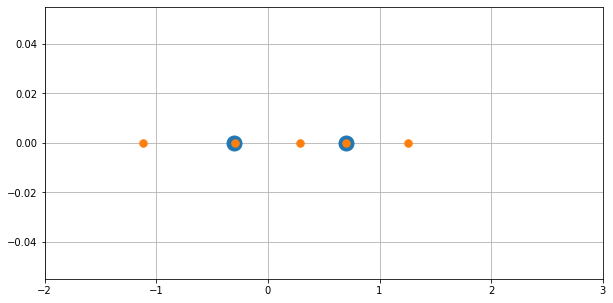

In [19]:
fig=plt.figure(figsize=(10,5))
ax=plt.axes()
ax.grid()
ax.plot([x1,x2],[0,0],'o',markersize=15)
ax.plot(ptos_crucex,ptos_crucey,'.',markersize=15)
plt.xlim(-2,3)
plt.show()

## **5)** Velocidad mínima respecto a un sistema rotante.

Una nave espacial se encuentra en una  ́orbita circular alrededor de la tierra con una altitud de 100 km y con un inclinación orbital respecto al ecuador terrestre de 28,6◦ (esto  ́ultimo garantiza que la nave espacial y la Luna se mueven sobre el mismo plano). A la nave se le dar ́a un incremento tangencial en la velocidad, de tal manera que la  ́orbita subsecuente sea capaz de llevarla a una  ́orbita lunar sin variar su inclinaci ́on orbital y con el mınimo gasto de combustible posible. Considerando la teorıa alrededor de la constante de Jacobi, encuentre la velocidad mínima que deberıa tener la nave espacial (respecto al sistema rotante) requerida para este proposito. (Hint: calcule el
valor de C asociado con una partıcula hipotetica en reposo localizada en L1)

In [20]:
mt=5.97e24 #masa tierra 
ml=7.349e22 #masa luna
I=28.6*np.pi/180

#Unidades caníncas
a=381555 #semieje mayor luna
T=27*24*60**2 #Periodo orbital de la luna

uL=a
uT=T/(2*np.pi)**2 
uM=(mt+ml)

In [21]:
alpha=ml/(mt+ml)
x1=-alpha
x2=1-alpha

In [22]:
rango=[-2,3]
def f1(x): 
    return x-(1-alpha)*(x-x1)/abs(x-x1)**3-alpha*(x-x2)/abs(x-x2)**3
def f2(x):
    return 0

x_array=np.arange(rango[0],rango[1],.001)
y1_array=[f1(i) for i in x_array]
y2_array=[f2(i) for i in x_array]

ptosx=[]
ptosy1=[]
ptosy2=[]

# Verificamos que haya interseccion
for i in range(len(x_array)-1):
    if y1_array[i]<y2_array[i] and y1_array[i+1]>=y2_array[i+1] or y1_array[i]>=y2_array[i] and y1_array[i+1]<y2_array[i+1]:
    
        ptosx.append(x_array[i])
        ptosx.append(x_array[i+1])
        
        ptosy1.append(y1_array[i])
        ptosy1.append(y1_array[i+1])
    
        ptosy2.append(y2_array[i])
        ptosy2.append(y2_array[i+1])


def cruce_rectas(x1,x2,y11,y12,y21,y22):
    
    m1=(y12-y11)/(x2-x1)
    m2=(y22-y21)/(x2-x1)
    
    if (m1!=m2):
        
        b1=-x1*m1+y11
        b2=-x1*m2+y21

        #Pto de interseccion (a,c)
        a=(b2-b1)/(m1-m2)
        c=a*m1+b1
    
        return (a,c)

#Se recorre la lista x_array usando la funcion cruce_rectas 
ptos_crucex=[]
ptos_crucey=[]

#El indice es por que cruce_rectas entrega dos argumentos
for i in range(0,len(ptosx),2):
    ptos_crucex.append(cruce_rectas(ptosx[i],ptosx[i+1],ptosy1[i],ptosy1[i+1],ptosy2[i],ptosy2[i+1])[0])
    ptos_crucey.append(cruce_rectas(ptosx[i],ptosx[i+1],ptosy1[i],ptosy1[i+1],ptosy2[i],ptosy2[i+1])[1])

print("Se encontraron %d raices en el rango dado \n" %(len(ptos_crucex)))
for i in range(len(ptos_crucex)):
    print ('x=%.2f' %(ptos_crucex[i]))

Se encontraron 5 raices en el rango dado 

x=-1.01
x=-0.01
x=0.84
x=0.99
x=1.16


Se halla el valor del punto de Lagrange en medio de los dos cuerpos. **$L_1$=0.84** en unidades canónicas

In [23]:
L=.84
r1=alpha+L
r2=1-alpha-L
print('r1=%.5f,r2=%.5f'%(r1,r2))

r1=0.85216,r2=0.14784


$$C=-v^2+2\frac{(1-\alpha)}{r_1}+2\frac{\alpha}{r_2}+2 h cosI$$

Se sabe además que $h^2=\mu a(1-e^2)$, donde $e=0$ pues es una órbira circular y $a=1$, $\mu=1$en unidades canónicas. Entonces $h=1$. En un punto de Lagrange $v=0$. $I=28.6$

In [24]:
c=2*(1-alpha)/r1+2*alpha/r2+2*np.cos(I)

Además, por el ejercicio **3)** se sabe que $C_{min}=3-\alpha(1-\alpha)$